# Import libraries

In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_palette('GnBu_r')

I don't want to see any FutureWarnings

In [96]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Reading and cleaning our data

In [97]:
df = pd.read_csv("Coffee_Shop_Sales.csv", delimiter=';')
# df = pd.read_excel("Coffee Shop Sales.xlsx")
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,01.01.2023,7:06:11,2,5,Lower Manhattan,32,3,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,01.01.2023,7:08:56,2,5,Lower Manhattan,57,"3,1",Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,01.01.2023,7:14:04,2,5,Lower Manhattan,59,"4,5",Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,01.01.2023,7:20:24,1,5,Lower Manhattan,22,2,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,01.01.2023,7:22:41,2,5,Lower Manhattan,57,"3,1",Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [98]:
df.shape

(149116, 11)

In [99]:
df.isna().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [100]:
df.duplicated().any()

False

Drop some columns

In [101]:
df = df.drop(columns = ['transaction_id', 'store_id', 'product_id'])

Everything looks good, let's optimize our memory usage

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   transaction_date  149116 non-null  object
 1   transaction_time  149116 non-null  object
 2   transaction_qty   149116 non-null  int64 
 3   store_location    149116 non-null  object
 4   unit_price        149116 non-null  object
 5   product_category  149116 non-null  object
 6   product_type      149116 non-null  object
 7   product_detail    149116 non-null  object
dtypes: int64(1), object(7)
memory usage: 9.1+ MB


See unique data in every column

In [103]:
columnValue = df.nunique().reset_index()
columnValue = columnValue.rename(columns = {"index" : "Column _name", 0 : "Unique values"})
columnValue

,Column _name,Unique values
0,transaction_date,181
1,transaction_time,25762
2,transaction_qty,6
3,store_location,3
4,unit_price,41
5,product_category,9
6,product_type,29
7,product_detail,80


In [104]:
df['transaction_qty'].max()

8

In [105]:
df['unit_price'] = df['unit_price'].apply(lambda x: x.replace(',', '.'))
df['unit_price'] = df['unit_price'].astype('float')

Let's change downcast some columns as categories and as int8

In [106]:
df['transaction_qty'] = df['transaction_qty'].astype('int8')
df['store_location'] = df['store_location'].astype('category')
df['store_location'] = df['store_location'].astype('category')
df['product_category'] = df['product_category'].astype('category')
df['product_type'] = df['product_type'].astype('category')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   transaction_date  149116 non-null  object  
 1   transaction_time  149116 non-null  object  
 2   transaction_qty   149116 non-null  int8    
 3   store_location    149116 non-null  category
 4   unit_price        149116 non-null  float64 
 5   product_category  149116 non-null  category
 6   product_type      149116 non-null  category
 7   product_detail    149116 non-null  object  
dtypes: category(3), float64(1), int8(1), object(3)
memory usage: 5.1+ MB


We managed to quickly clean up 3 MBs of memory!

In [108]:
df.describe(include=['category', 'object'])

,transaction_date,transaction_time,store_location,product_category,product_type,product_detail
count,149116,149116,149116,149116,149116,149116
unique,181,25762,3,9,29,80
top,19.06.2023,9:31:15,Hell's Kitchen,Coffee,Brewed Chai tea,Chocolate Croissant
freq,1343,41,50735,58416,17183,3076


# Analyzing and visualizing

In [109]:
# Count bar plot
def count_plot(data=df, x_axis = None, y_axis = None, hue=None, top = 5, to_label=True, title=None):
    fig, ax = plt.subplots(figsize=(12, 5))
    if x_axis:
        to_plot = df[x_axis].value_counts().iloc[:top].index
    else:
        to_plot = df[y_axis].value_counts().iloc[:top].index

    plot = sns.countplot(data=data, x=x_axis, y=y_axis, order=to_plot, hue=hue, ax=ax, palette='GnBu_r')
    if to_label is True:
        plot.bar_label(plot.containers[0])

    plt.title(title)
    plt.xticks(rotation=25)
    
    plt.show()

    

In [110]:
# create function that visualized categorical column using pie plot

def pie_plot(data = df, axis = None, title=None):
    explodeList = [0] * df[axis].nunique()
    # print(explodeList)
    plt.pie(data[axis].value_counts(), labels = data[axis].value_counts().index, shadow = True, autopct = "%1.1f%%")
    plt.title(title)
    
    plt.show()

Working with 'transaction_date' column

Add columns for year, month, day and weekday

In [111]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'], dayfirst=True)
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month_name()
df['day'] = df['transaction_date'].dt.day
df['weekday'] = df['transaction_date'].dt.day_name()
df.tail()

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day,weekday
149111,2023-06-30,20:18:41,2,Hell's Kitchen,2.50,Tea,Brewed herbal tea,Peppermint Rg,2023,June,30,Friday
149112,2023-06-30,20:25:10,2,Hell's Kitchen,3.00,Tea,Brewed Black tea,English Breakfast Lg,2023,June,30,Friday
149113,2023-06-30,20:31:34,1,Hell's Kitchen,3.00,Tea,Brewed herbal tea,Peppermint Lg,2023,June,30,Friday
149114,2023-06-30,20:57:19,1,Hell's Kitchen,3.75,Coffee,Barista Espresso,Cappuccino,2023,June,30,Friday
149115,2023-06-30,20:57:19,2,Hell's Kitchen,0.80,Flavours,Regular syrup,Hazelnut syrup,2023,June,30,Friday


In [112]:
df['year'].unique(), df['month'].unique()

(array([2023]),
 array(['January', 'February', 'March', 'April', 'May', 'June'],
       dtype=object))

Sales only from first six months of 2023

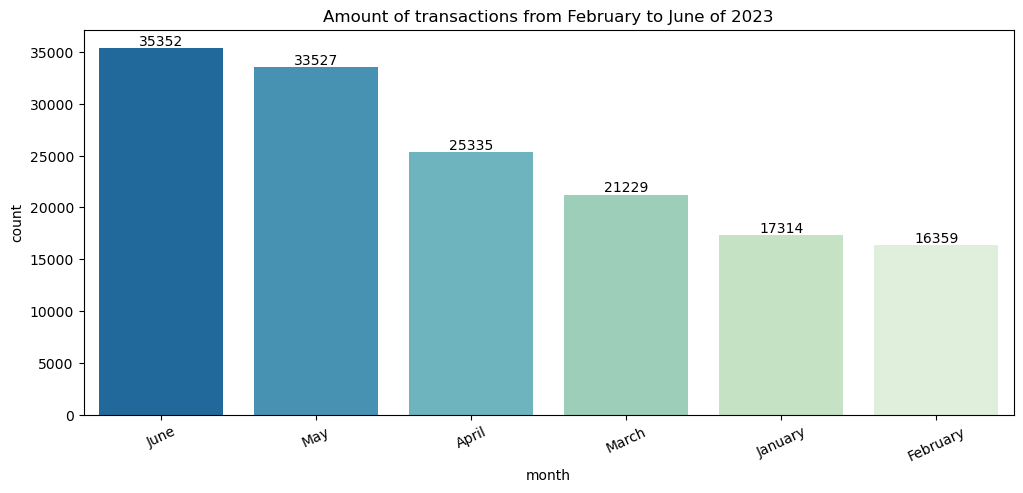

In [113]:
count_plot(x_axis='month', top=6, title="Amount of transactions from February to June of 2023")

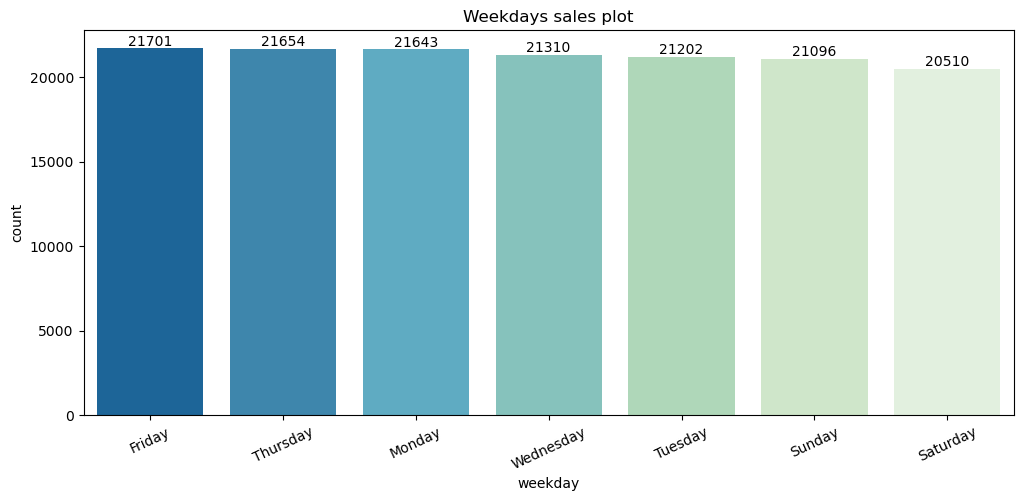

In [114]:
count_plot(x_axis='weekday', top=7, title="Weekdays sales plot")

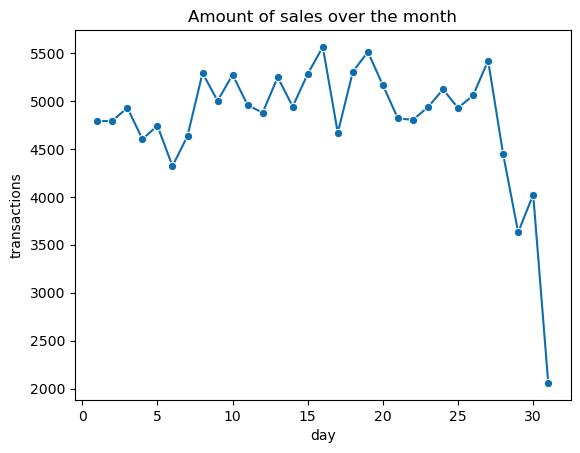

In [115]:
day_counts = df['day'].value_counts().sort_index()
day_counts = pd.DataFrame({'day': day_counts.index, 'transactions': day_counts.values})
sns.lineplot(data=day_counts, x='day', y='transactions', marker="o")
plt.title("Amount of sales over the month")
plt.show()


Our coffee points peaked in the middle of the month

Analyzing 'transaction_time' column

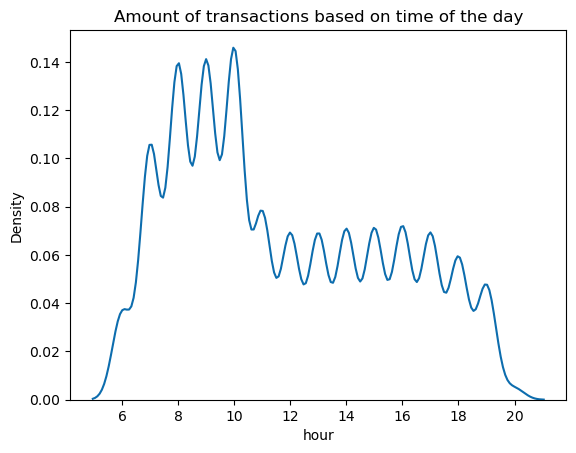

In [116]:
df['hour'] = pd.to_datetime(df['transaction_time'], format= '%H:%M:%S').dt.hour
sns.kdeplot(df['hour'])
plt.title("Amount of transactions based on time of the day")

plt.show()

Peak hours are from 8 to 11 PM

Discovering 'store_location' column

In [117]:
df['store_location'].unique()

['Lower Manhattan', 'Hell's Kitchen', 'Astoria']
Categories (3, object): ['Astoria', 'Hell's Kitchen', 'Lower Manhattan']

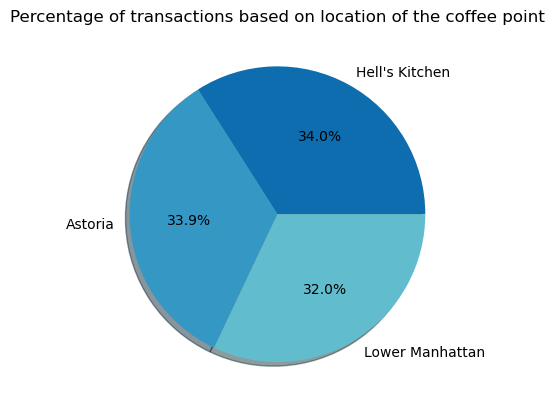

In [118]:
pie_plot(axis='store_location', title="Percentage of transactions based on location of the coffee point")

Based on amount of transactions, our Lower Manhattan point is performing a little worse than Astonia and Hell's Kitchen points

Analyzing 'product_category' column

In [119]:
categories = df['product_category'].unique()
categories

['Coffee', 'Tea', 'Drinking Chocolate', 'Bakery', 'Flavours', 'Loose Tea', 'Coffee beans', 'Packaged Chocolate', 'Branded']
Categories (9, object): ['Bakery', 'Branded', 'Coffee', 'Coffee beans', ..., 'Flavours', 'Loose Tea', 'Packaged Chocolate', 'Tea']

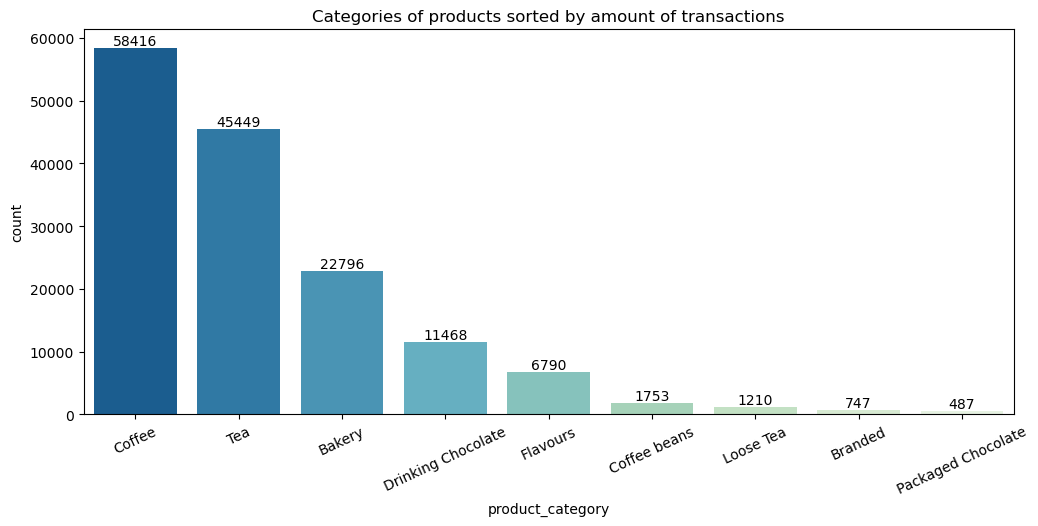

In [120]:
count_plot(x_axis='product_category', top=9, title="Categories of products sorted by amount of transactions")

Our most popular products are coffe and tea, followed by bakery

Looking at 'product_type' column

In [121]:
df['product_type'].unique()

['Gourmet brewed coffee', 'Brewed Chai tea', 'Hot chocolate', 'Drip coffee', 'Scone', ..., 'Organic Chocolate', 'Housewares', 'Black tea', 'House blend Beans', 'Clothing']
Length: 29
Categories (29, object): ['Barista Espresso', 'Biscotti', 'Black tea', 'Brewed Black tea', ..., 'Premium brewed coffee', 'Regular syrup', 'Scone', 'Sugar free syrup']

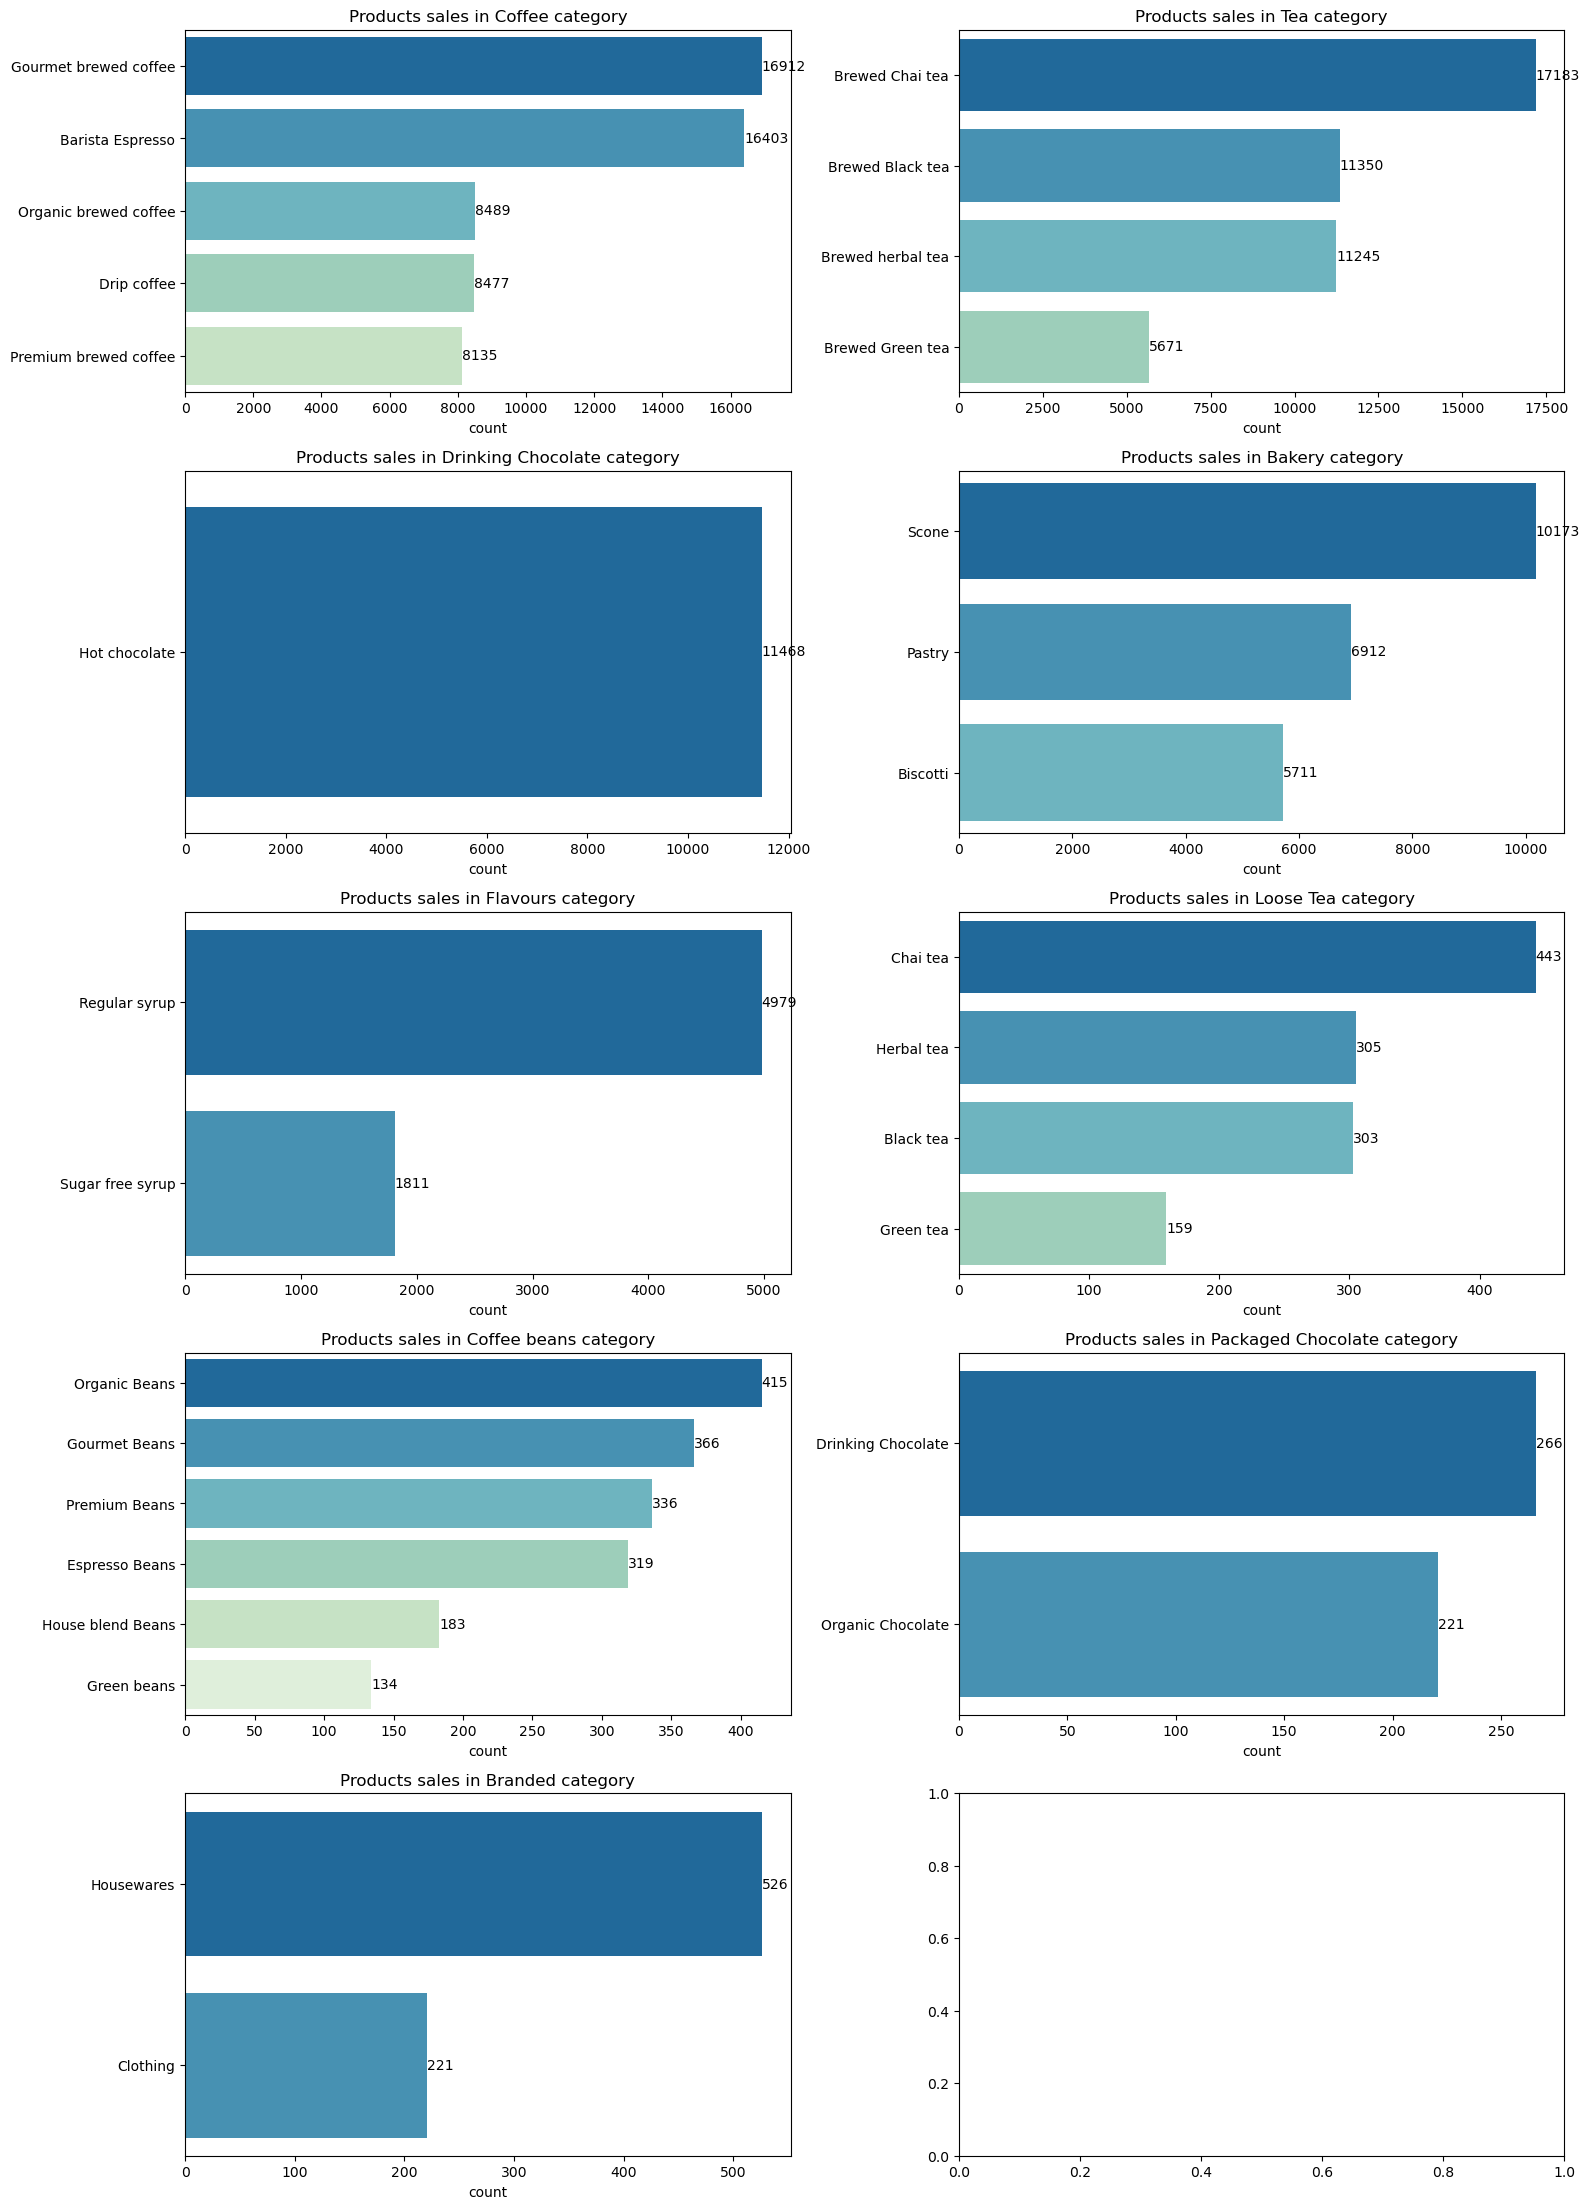

In [122]:
product_by_categories = df.groupby(['product_category', 'product_type']).size().reset_index(name='count')
fig, axes = plt.subplots(5, 2, figsize = (16, 22))
axes = axes.flatten()
for i, category in enumerate(categories):
    current = product_by_categories.query('count != 0 & product_category == "%s"' % category)
    current = current.sort_values('count', ascending=False)

    plt.subplot(5, 2, i + 1)
    plt.tight_layout()
    plot = sns.barplot(data=current, x='count', y='product_type', ax=axes[i], order=current['product_type'])
    plot.bar_label(plot.containers[0])

    axes[i].set_title(f'Products sales in {category} category')
    axes[i].set_ylabel('')





Let's have a look at what is our most popular coffee and bakery products

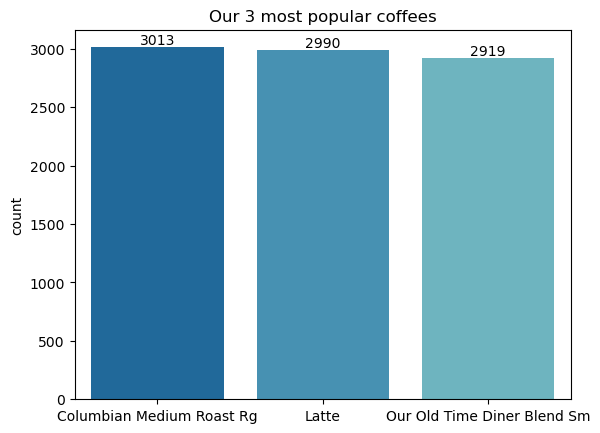

In [123]:
coffee_by_type = df.groupby(['product_detail', 'product_category']).size().reset_index(name='count').query('product_category == "Coffee" & count != 0')

plot = sns.barplot(data=coffee_by_type.nlargest(3, 'count'), x='product_detail', y='count')
plot.bar_label(plot.containers[0])
plot.set_title("Our 3 most popular coffees")
plot.set_xlabel("")

plt.show()

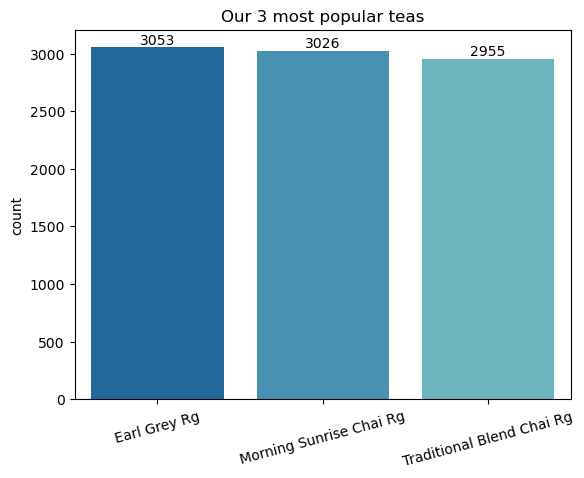

In [124]:
tea_by_type = df.groupby(['product_detail', 'product_category']).size().reset_index(name='count').query('product_category == "Tea" & count != 0')

plot = sns.barplot(data=tea_by_type.nlargest(3, 'count'), x='product_detail', y='count')
plot.set_title("Our 3 most popular teas")
plot.set_xlabel("")
plt.xticks(rotation=15)

plot.bar_label(plot.containers[0])

plt.show()

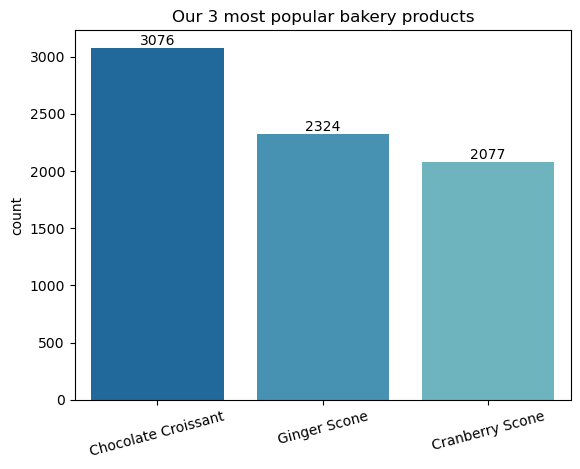

In [125]:
bakery_by_type = df.groupby(['product_detail', 'product_category']).size().reset_index(name='count').query('product_category == "Bakery" & count != 0')

plot = sns.barplot(data=bakery_by_type.nlargest(3, 'count'), x='product_detail', y='count')
plot.set_title("Our 3 most popular bakery products")
plot.set_xlabel("")
plt.xticks(rotation=15)

plot.bar_label(plot.containers[0])

plt.show()
   

How our prices looking?

In [126]:
df['unit_price'].unique()

array([ 3.  ,  3.1 ,  4.5 ,  2.  ,  4.25,  3.5 ,  2.55,  3.75,  2.5 ,
        4.75,  3.25,  4.  ,  2.2 ,  2.45,  0.8 ,  8.95, 21.  , 28.  ,
        6.4 , 19.75, 12.  , 18.  ,  9.5 , 10.  , 20.45,  9.25, 22.5 ,
       14.75,  7.6 , 14.  , 10.95, 13.33, 15.  ,  4.38,  4.06,  5.63,
        4.69, 45.  , 23.  ,  2.1 ,  2.65])

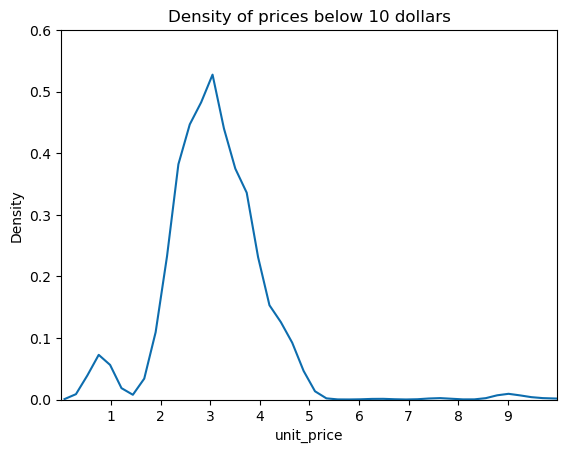

In [127]:
sns.kdeplot(data=df, x='unit_price')
plt.axis([0, 10, 0, 0.6])
plt.title("Density of prices below 10 dollars")
plt.xticks(range(1, 10))
plt.show()

Most of our products priced between 2.50 and 3.50 dollars 

Let's look at our revenue

In [128]:
df['total_revenue'] = df['transaction_qty'] * df['unit_price']
df.sample(3)

,transaction_date,transaction_time,transaction_qty,store_location,unit_price,product_category,product_type,product_detail,year,month,day,weekday,hour,total_revenue
108298,2023-05-26,13:58:23,2,Astoria,3.75,Coffee,Premium brewed coffee,Jamaican Coffee River Lg,2023,May,26,Friday,13,7.5
79975,2023-04-30,12:50:22,2,Hell's Kitchen,2.50,Tea,Brewed herbal tea,Peppermint Rg,2023,April,30,Sunday,12,5.0
86585,2023-05-07,8:14:03,1,Lower Manhattan,3.50,Bakery,Biscotti,Chocolate Chip Biscotti,2023,May,7,Sunday,8,3.5


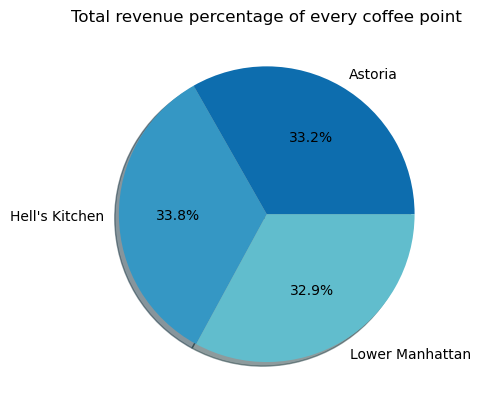

,store_location,total_revenue
0,Astoria,232243.91
1,Hell's Kitchen,236511.17
2,Lower Manhattan,230057.25


In [129]:
revenueByPoint = df[['total_revenue', 'store_location']].groupby('store_location').sum().reset_index()
plt.pie(revenueByPoint['total_revenue'], labels=revenueByPoint['store_location'], shadow=True, autopct="%1.1f%%")
plt.title("Total revenue percentage of every coffee point")
plt.show()
revenueByPoint

Our best perfoming store is actually the one located in Hell's Kitchen

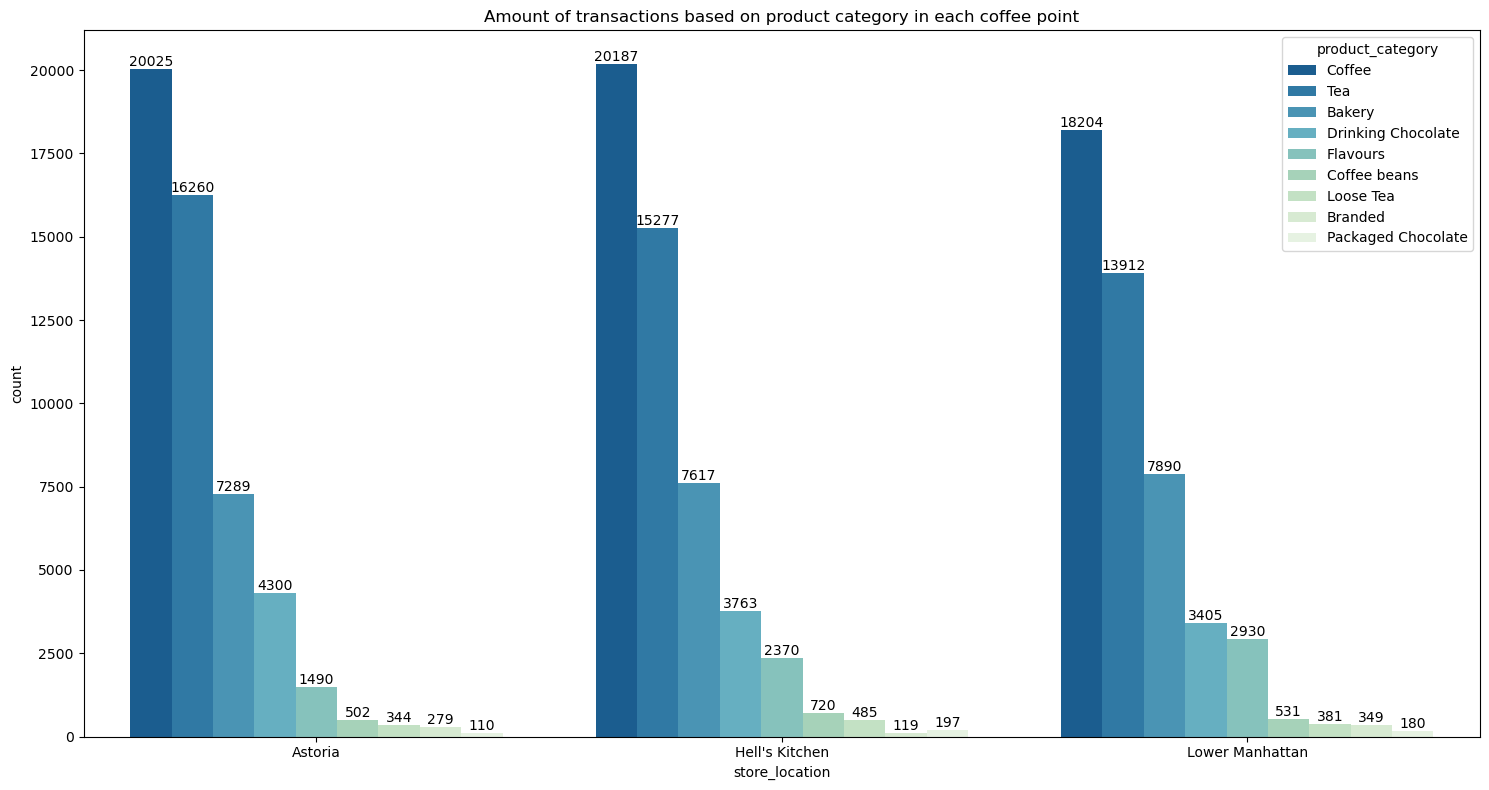

In [130]:
products_by_point = df.groupby('store_location')[['product_category']].value_counts().reset_index()
hue_categories = products_by_point.query('store_location == "Astoria"')['product_category']

plt.figure(figsize=(15, 8))
plot = sns.barplot(data=products_by_point, x='store_location', y='count', hue='product_category', hue_order=hue_categories, palette='GnBu_r')

for i in range(len(categories)):
    plot.bar_label(plot.containers[i])
plt.title("Amount of transactions based on product category in each coffee point")
plt.tight_layout()
plt.show()

Let's calculate categorical revenue

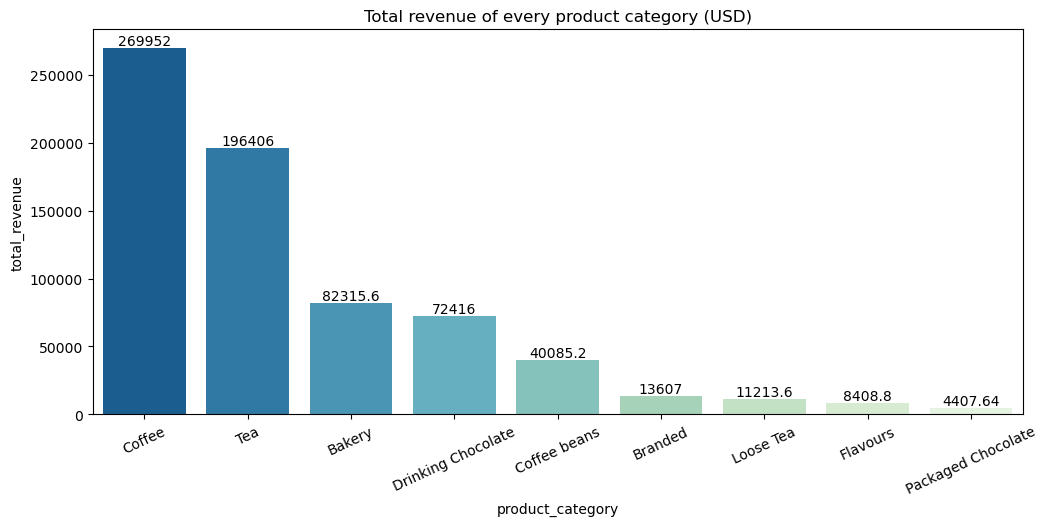

In [131]:
revenue_by_category = df.groupby('product_category')['total_revenue'].sum().reset_index().sort_values(by='total_revenue', ascending=False)

fig, ax = plt.subplots(figsize=(12, 5))
plot = sns.barplot(data=revenue_by_category, x='product_category', y='total_revenue', order=revenue_by_category['product_category'], palette='GnBu_r')
plot.bar_label(plot.containers[0])
plt.title("Total revenue of every product category (USD)")
plt.xticks(rotation=25)
plt.show()



Calculating and plotting monthly revenue

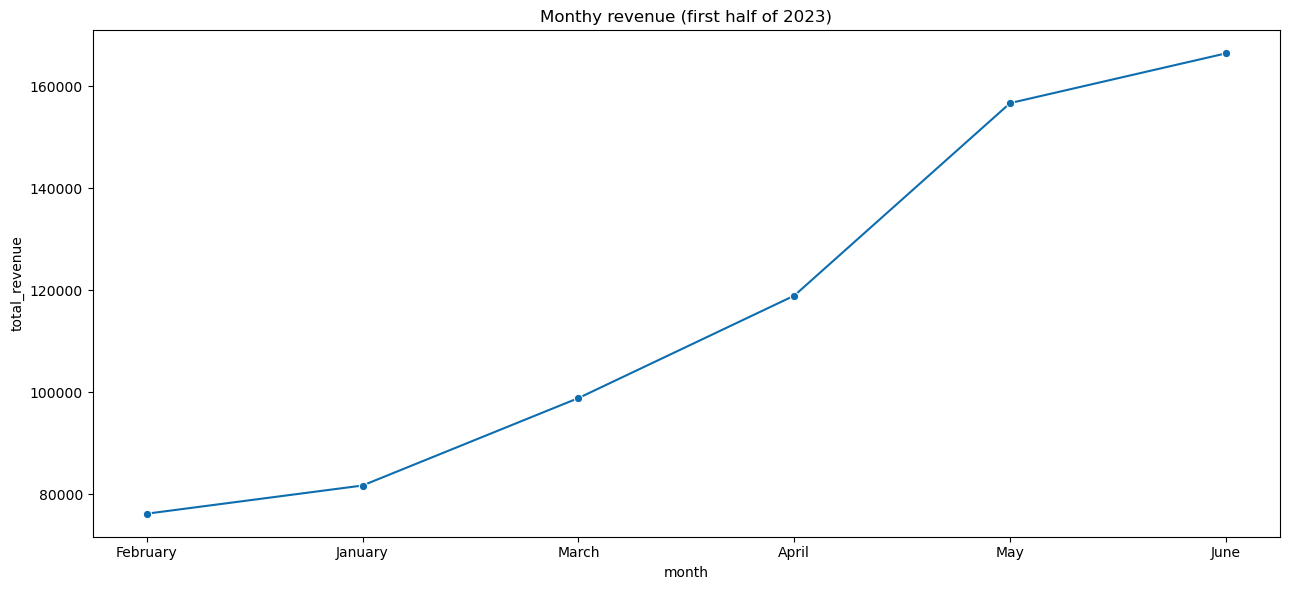

In [132]:
monthly_revenue = df.groupby('month')['total_revenue'].sum().reset_index().sort_values(by='total_revenue')

fig, ax = plt.subplots(figsize=(13, 6))
sns.lineplot(data=monthly_revenue, x='month', y ='total_revenue', marker="o")
plt.title("Monthy revenue (first half of 2023)")
plt.tight_layout()
plt.show()

We doubled our revenue from February to June! Great job!

Let's see the point which sells the most coffees

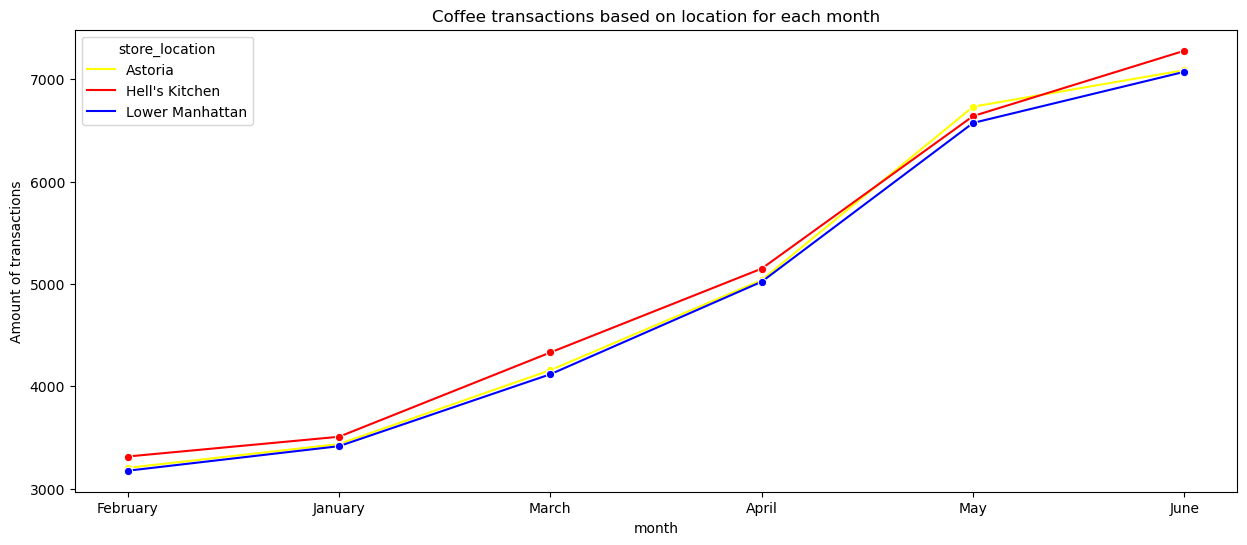

In [133]:
coffees_by_point = df.query('product_category == "Coffee"').groupby(['month', 'store_location'])['transaction_qty'].sum().sort_values().reset_index()

fig, ax = plt.subplots(figsize=(15, 6))
plot = sns.lineplot(data=coffees_by_point, x='month', y='transaction_qty', hue='store_location', palette=['yellow', 'red', 'blue'], marker="o")
plt.title("Coffee transactions based on location for each month")
plt.ylabel("Amount of transactions", rotation=90)

plt.show()

We can see that our sales went up, it means that we are on the right way! 